In [300]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [301]:
data_file=r'C:/Users/MORA.SHIVARAMAKRISHN/Desktop/python_jupiter/Data/Existing Base.csv'
bd=pd.read_csv(data_file)

In [302]:
bd.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average Credit Card Transaction', 'Balance Transfer',
       'Term Deposit', 'Life Insurance', 'Medical Insurance',
       'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance'],
      dtype='object')

In [303]:
bd.isnull().sum()

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average Credit Card Transaction    0
Balance Transfer                   0
Term Deposit                       0
Life Insurance                     0
Medical Insurance                  0
Average A/C Balance                0
Personal Loan                      0
Investment in Mutual Fund          0
Investment Tax Saving Bond         0
Home Loan                          0
Online Purchase Amount             0
Revenue Grid                       0
gender                             0
r

In [304]:
bd

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,11512,1,45-50,Partner,Secretarial/Admin,Manual Worker,Own Home,"<30,000, >=27,500",No,No,...,4.49,0.00,0.00,2,Female,South East,7.29,3.50,9.57,10.23
10151,11513,Zero,45-50,Partner,Manual Worker,Manual Worker,Rent from Council/HA,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,2,Female,South East,62.27,3.00,36.40,102.62
10152,11514,2,41-45,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,2,Female,South East,52.77,0.00,14.07,76.18
10153,11516,Zero,51-55,Partner,Other,Manual Worker,Own Home,"<10,000, >= 8,000",No,Yes,...,0.00,7.98,0.00,2,Female,South East,7.20,2.99,1.66,4.79


In [305]:
bd.loc[bd["children"]=="Zero","children"]="0"
bd.loc[bd["children"]=="4+","children"]="4"
bd["children"]=pd.to_numeric(bd["children"],errors="coerce")
bd["y"]=1
bd.loc[bd["Revenue Grid"]==2,"y"]=0
bd=bd.drop(["Revenue Grid"],1)
for i in range(len(bd)):
    if bd["age_band"][i] in ["71+","65-70","51-55","45-50"]:
        bd.loc[i,"age_band"]="ab_10"
    if bd["age_band"][i] in ["55-60","41-45","31-35","22-25","26-30"]:
        bd.loc[i,"age_band"]="ab_11"
    if bd["age_band"][i]=="36-40":
        bd.loc[i,"age_band"]="ab_13"
    if bd["age_band"][i]=="18-21":
        bd.loc[i,"age_band"]="ab_17"
    if bd["age_band"][i]=="61-65":
        bd.loc[i,"age_band"]="ab_9"
ab_dummies=pd.get_dummies(bd["age_band"])
bd=pd.concat([bd,ab_dummies],1)
bd=bd.drop(["age_band","Unknown"],1)
bd["st_partner"]=0
bd["st_singleNm"]=0
bd["st_divSep"]=0
bd.loc[bd["status"]=="Partner","st_partner"]=1
bd.loc[bd["status"]=="Single/Never Married","st_singleNm"]=1
bd.loc[bd["status"]=="Divorced/Separated","st_divSep"]=1
bd=bd.drop(["status"],1)
for i in range(len(bd)):
    if bd["occupation"][i] in ["Unknown","Student","Secretarial/Admin",
                               "Other","Manual Worker"]:
        bd.loc[i,"occupation"]="oc_11"
    if bd["occupation"][i] in ["Professional","Business Manager"]:
        bd.loc[i,"occupation"]="oc_12"
    if bd["occupation"][i]=="Retired":
        bd.loc[i,"occupation"]="oc_10"
oc_dummies=pd.get_dummies(bd["occupation"])
bd=pd.concat([bd,oc_dummies],1)

bd=bd.drop(["occupation","Housewife"],1)
bd["ocp_10"]=0
bd["ocp_12"]=0

for i in range(len(bd)):
    if bd["occupation_partner"][i] in ["Unknown","Retired","Other"]:
        bd.loc[i,"ocp_10"]=1
    if bd["occupation_partner"][i] in ["Student","Secretarial/Admin"]:
        bd.loc[i,"ocp_12"]=1
bd=bd.drop(["occupation_partner","TVarea","post_code","post_area","region"],1)
bd["hs_own"]=0
bd.loc[bd["home_status"]=="Own Home","hs_own"]=1
del bd["home_status"]
bd["gender_f"]=0
bd.loc[bd["gender"]=="Female","gender_f"]=1
del bd["gender"]
bd["semp_yes"]=0
bd.loc[bd["self_employed"]=="Yes","semp_yes"]=1
del bd["self_employed"]
bd["semp_part_yes"]=0
bd.loc[bd["self_employed_partner"]=="Yes","semp_part_yes"]=1
del bd["self_employed_partner"]
bd["fi"]=4
bd.loc[bd["family_income"]=="< 8,000, >= 4,000","fi"]=6
bd.loc[bd["family_income"]=="<10,000, >= 8,000","fi"]=9
bd.loc[bd["family_income"]=="<12,500, >=10,000","fi"]=11.25
bd.loc[bd["family_income"]=="<15,000, >=12,500","fi"]=13.75
bd.loc[bd["family_income"]=="<17,500, >=15,000","fi"]=16.25
bd.loc[bd["family_income"]=="<20,000, >=17,500","fi"]=18.75
bd.loc[bd["family_income"]=="<22,500, >=20,000","fi"]=21.25
bd.loc[bd["family_income"]=="<25,000, >=22,500","fi"]=23.75
bd.loc[bd["family_income"]=="<27,500, >=25,000","fi"]=26.25
bd.loc[bd["family_income"]=="<30,000, >=27,500","fi"]=28.75
bd.loc[bd["family_income"]==">=35,000","fi"]=35
bd=bd.drop(["family_income"],1)

In [306]:
bd1=bd

In [307]:
bd.columns

Index(['REF_NO', 'children', 'year_last_moved',
       'Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit',
       'Life Insurance', 'Medical Insurance', 'Average A/C Balance',
       'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Investment in Commudity', 'Investment in Equity',
       'Investment in Derivative', 'Portfolio Balance', 'y', 'ab_10', 'ab_11',
       'ab_13', 'ab_17', 'ab_9', 'st_partner', 'st_singleNm', 'st_divSep',
       'oc_10', 'oc_11', 'oc_12', 'ocp_10', 'ocp_12', 'hs_own', 'gender_f',
       'semp_yes', 'semp_part_yes', 'fi'],
      dtype='object')

In [308]:
bd=bd[['REF_NO', 'children', 'year_last_moved',
       'Average Credit Card Transaction', 'Balance Transfer', 'Term Deposit',
       'Life Insurance', 'Medical Insurance', 'Average A/C Balance',
       'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Investment in Commudity', 'Investment in Equity',
       'Investment in Derivative', 'Portfolio Balance', 'ab_10', 'ab_11',
       'ab_13', 'ab_17', 'ab_9', 'st_partner', 'st_singleNm', 'st_divSep',
       'oc_10', 'oc_11', 'oc_12', 'ocp_10', 'ocp_12', 'hs_own', 'gender_f',
       'semp_yes', 'semp_part_yes', 'fi']]

In [309]:
bd.corr()

,REF_NO,children,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,...,oc_10,oc_11,oc_12,ocp_10,ocp_12,hs_own,gender_f,semp_yes,semp_part_yes,fi
REF_NO,1.000000,0.007627,0.028739,-0.001217,-0.010711,-0.002313,0.008301,0.020776,-0.005197,-0.010802,...,0.005487,-0.017181,0.010126,0.008513,-0.002724,0.009599,-0.017600,0.000318,-0.012967,-0.007034
children,0.007627,1.000000,0.055156,0.008118,0.031916,0.021164,0.049421,0.013078,0.035850,0.108209,...,-0.330381,0.067629,0.134261,-0.324670,0.033526,0.046907,0.017036,0.051199,0.121847,0.253937
year_last_moved,0.028739,0.055156,1.000000,0.014296,0.013535,0.004404,0.010689,0.015484,0.003031,0.019718,...,0.003061,-0.061580,0.046184,-0.070361,0.005981,0.157030,0.015834,0.014272,0.029452,0.115191
Average Credit Card Transaction,-0.001217,0.008118,0.014296,1.000000,0.123855,0.323462,0.145041,0.405090,0.172240,0.087289,...,-0.021849,0.016586,0.008504,-0.025162,0.001567,-0.001773,-0.003648,0.003869,0.005971,0.026565
Balance Transfer,-0.010711,0.031916,0.013535,0.123855,1.000000,0.229457,0.564538,0.162085,0.358938,0.351499,...,-0.021744,0.008904,0.019835,-0.021973,0.006101,-0.000019,-0.011185,0.012110,0.011170,0.042888
Term Deposit,-0.002313,0.021164,0.004404,0.323462,0.229457,1.000000,0.274691,0.506367,0.274027,0.146755,...,-0.029942,0.020431,0.006733,-0.019097,0.001469,0.007806,-0.006657,-0.001773,0.014586,0.041756
Life Insurance,0.008301,0.049421,0.010689,0.145041,0.564538,0.274691,1.000000,0.238435,0.514339,0.380563,...,-0.043069,0.022105,0.029504,-0.037871,0.015812,0.013095,-0.013030,0.018064,0.037091,0.053594
Medical Insurance,0.020776,0.013078,0.015484,0.405090,0.162085,0.506367,0.238435,1.000000,0.264615,0.105134,...,-0.018101,0.010350,0.008800,-0.024134,0.004782,0.013722,-0.000262,-0.001882,0.008682,0.038416
Average A/C Balance,-0.005197,0.035850,0.003031,0.172240,0.358938,0.274027,0.514339,0.264615,1.000000,0.219801,...,-0.032801,0.016492,0.014704,-0.023608,0.015826,0.005280,0.005468,0.007690,0.017236,0.039226
Personal Loan,-0.010802,0.108209,0.019718,0.087289,0.351499,0.146755,0.380563,0.105134,0.219801,1.000000,...,-0.082211,0.009174,0.067087,-0.087840,0.037569,0.030919,-0.001480,0.018103,0.026320,0.110438


In [310]:
import seaborn as sns
%matplotlib inline

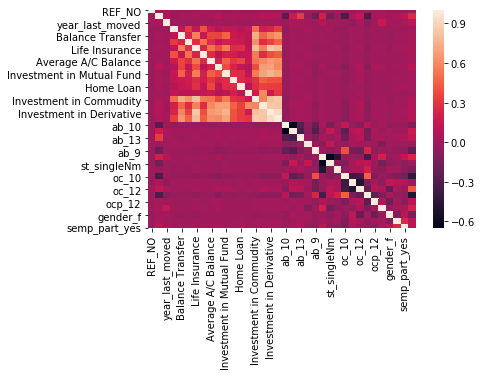

In [312]:
sns.heatmap(bd.corr())

In [313]:
bd.shape

(10155, 36)

In [314]:
X=bd.copy()

In [315]:
type(X)

pandas.core.frame.DataFrame

In [316]:
X

,REF_NO,children,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,...,oc_10,oc_11,oc_12,ocp_10,ocp_12,hs_own,gender_f,semp_yes,semp_part_yes,fi
0,1,0,1972,148.44,142.95,0.00,81.96,0.00,29.99,0.00,...,0,1,0,0,1,1,1,0,0,16.25
1,2,0,1998,0.00,74.98,0.00,25.99,0.00,0.00,0.00,...,1,0,0,1,0,1,1,0,0,26.25
2,3,0,1996,0.00,166.44,20.99,291.37,11.48,166.94,0.00,...,0,0,1,1,0,1,0,1,0,28.75
3,5,0,1997,0.00,0.00,0.00,20.49,0.00,39.46,0.00,...,0,0,1,0,0,1,1,0,0,13.75
4,6,0,1995,73.45,57.96,0.00,177.42,41.95,39.47,10.97,...,0,0,1,1,0,1,1,0,0,28.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,11512,1,1972,0.00,0.00,0.00,29.97,6.49,0.00,8.99,...,0,1,0,0,0,1,1,0,0,28.75
10151,11513,0,1988,0.00,110.95,0.00,200.41,0.00,2.99,0.00,...,0,1,0,0,0,0,1,0,0,23.75
10152,11514,2,1992,124.93,0.00,54.48,0.00,84.42,0.00,0.00,...,0,0,0,0,0,1,1,0,0,35.00
10153,11516,0,1970,0.00,35.98,0.00,0.00,0.00,0.00,0.00,...,0,1,0,0,0,1,1,0,1,9.00


In [317]:
X=scale(X)

In [318]:
X

array([[-1.73545756, -0.70151221,  0.02010969, ..., -0.27603902,
        -0.35367088, -0.65127556],
       [-1.73515678, -0.70151221,  0.16439913, ..., -0.27603902,
        -0.35367088,  0.37155961],
       [-1.734856  , -0.70151221,  0.15329995, ...,  3.62267623,
        -0.35367088,  0.6272684 ],
       ...,
       [ 1.72743824,  1.47138896,  0.13110157, ..., -0.27603902,
        -0.35367088,  1.26654038],
       [ 1.7280398 , -0.70151221,  0.00901051, ..., -0.27603902,
         2.8274875 , -1.39283106],
       [ 1.72864136,  0.38493838,  0.15329995, ..., -0.27603902,
        -0.35367088,  0.37155961]])

In [319]:
pca=PCA(n_components=36)

In [320]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=36, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [321]:
pca.components_

array([[-1.04914959e-03,  4.44440453e-02,  9.78370210e-03, ...,
         1.12933126e-02,  1.81558511e-02,  5.27239344e-02],
       [ 2.14719639e-03, -3.31773798e-01, -7.32210710e-02, ...,
        -9.67191682e-02, -1.20962467e-01, -4.04900182e-01],
       [ 1.43780221e-03, -1.57804793e-02, -8.33322025e-02, ...,
        -9.17022007e-03, -7.00307654e-02, -3.55055138e-02],
       ...,
       [ 4.76180377e-09,  2.71959958e-07,  1.46290779e-06, ...,
        -2.67128622e-08, -7.07925272e-07, -4.35559366e-07],
       [-2.38207037e-07, -5.05390564e-07,  1.60059042e-06, ...,
        -3.28421846e-07,  6.16799395e-07, -3.37497207e-07],
       [-2.06322511e-07,  3.51507551e-07,  8.20893427e-07, ...,
         2.59522051e-07,  1.28255662e-07,  9.83527375e-09]])

In [322]:
pca.components_.shape

(36, 36)

In [323]:
var=pca.explained_variance_ratio_
print(var)

[1.92185129e-01 8.44106227e-02 5.78677533e-02 4.82016936e-02
 4.48724579e-02 4.13432533e-02 3.76947226e-02 3.49435185e-02
 3.35975047e-02 3.28703279e-02 3.10625145e-02 2.93399799e-02
 2.81612960e-02 2.78145599e-02 2.54678740e-02 2.29002317e-02
 2.26604424e-02 2.21374664e-02 2.02297185e-02 1.91648744e-02
 1.86885438e-02 1.81662060e-02 1.71389690e-02 1.52709463e-02
 1.38575198e-02 1.33454343e-02 1.29407793e-02 1.18221962e-02
 1.12747902e-02 4.43921689e-03 4.08661622e-03 1.87813289e-03
 1.64707462e-04 1.31459298e-10 1.03000799e-10 7.31118650e-11]


In [324]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,4)*100)
print(var1)

[ 19.22  27.66  33.45  38.27  42.76  46.89  50.66  54.15  57.51  60.8
  63.91  66.84  69.66  72.44  74.99  77.28  79.55  81.76  83.78  85.7
  87.57  89.39  91.1   92.63  94.02  95.35  96.64  97.82  98.95  99.39
  99.8   99.99 100.01 100.01 100.01 100.01]


In [325]:
pca=PCA(n_components=32)

In [326]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [327]:
pca.components_.shape

(32, 36)

In [328]:
X1=pd.DataFrame(pca.transform(X))

In [329]:
X1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.854509,-0.040377,-1.178927,-0.940317,-0.398720,-1.850018,2.068344,0.291701,1.765678,-0.049157,...,0.779886,-0.192194,0.064094,0.781141,0.242197,0.231207,0.225338,-0.103726,-0.223823,0.333952
1,-1.927595,1.499851,2.442060,0.818091,-0.084734,1.169857,0.647033,-0.646585,-0.411825,0.461499,...,0.723588,-0.076035,-0.129594,-1.558830,0.472194,0.577514,-0.072256,0.024117,-0.334828,-0.013284
2,2.804527,0.020098,3.021446,2.181713,0.372529,-0.393041,0.662516,-2.379095,-1.880213,2.826781,...,-0.772663,-0.848049,2.084596,-0.279310,-0.842809,-0.213338,-0.125042,0.286558,-0.133084,0.329014
3,-1.563696,0.388389,4.126519,1.240956,0.223472,-2.003881,0.930370,1.011580,2.270765,4.213450,...,-0.553817,-0.367949,-0.204716,0.382384,0.351483,-1.618498,0.968339,-0.148264,-0.236847,0.691172
4,3.370867,0.684389,-0.960350,1.160467,0.692975,-0.912284,0.255117,0.517311,-0.903971,-0.222209,...,0.520548,0.768534,-1.886148,1.122793,-0.943412,1.178810,-1.014010,-0.033703,-0.109601,-0.230778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,-1.837327,-0.775596,-1.151287,-1.180562,0.572145,-1.171143,0.855598,0.345305,0.215456,-0.859926,...,0.154271,-0.670455,-0.243190,-0.264268,0.034595,0.071902,-0.294209,-0.200115,-0.135305,0.086475
10151,-0.136066,0.537474,-0.173548,-1.495837,0.848971,-1.480589,1.532675,-0.670710,1.253865,-0.258254,...,0.482246,0.494556,0.068147,-0.608697,-0.358922,-0.152561,-0.969400,-0.126058,-0.099962,0.008972
10152,-0.341972,-1.805467,-0.143685,-0.528037,-3.254999,0.509005,-0.233438,0.158864,-0.019457,-1.208919,...,0.034338,-0.750925,-0.510735,-1.052051,-0.193082,0.488752,-0.051414,0.858168,0.401011,-0.085023
10153,-2.001700,0.024293,-1.285349,-2.181523,0.819580,-1.208299,0.710683,-0.048100,-1.275825,0.233997,...,0.447959,0.173392,-0.391673,0.480336,-0.156294,-1.216773,0.894074,-0.295665,-0.269675,0.046199


In [330]:
loadings=pca.components_[0]
loadings

array([-0.00104915,  0.04444405,  0.0097837 ,  0.13737043,  0.24946953,
        0.18671113,  0.302213  ,  0.1807592 ,  0.25585946,  0.22544423,
        0.27474631,  0.17384878,  0.15193189,  0.120482  ,  0.33773202,
        0.32788377,  0.36296649,  0.36597261, -0.02435652,  0.02175394,
        0.02344564,  0.01038684, -0.02530576,  0.01469252, -0.0027196 ,
       -0.00252685, -0.04484579,  0.01202838,  0.03115855, -0.04257508,
        0.01394537,  0.01110603, -0.00421471,  0.01129331,  0.01815585,
        0.05272393])

In [331]:
list(zip(bd2.columns,loadings))

[('REF_NO', -0.0010491495875515101),
 ('children', 0.044444045347356215),
 ('year_last_moved', 0.009783702099647582),
 ('Average Credit Card Transaction', 0.13737042520829418),
 ('Balance Transfer', 0.24946952605273282),
 ('Term Deposit', 0.18671112558613487),
 ('Life Insurance', 0.3022130009198564),
 ('Medical Insurance', 0.18075919599215048),
 ('Average A/C Balance', 0.25585945957381667),
 ('Personal Loan', 0.22544422897487562),
 ('Investment in Mutual Fund', 0.2747463146859297),
 ('Investment Tax Saving Bond', 0.17384877993055112),
 ('Home Loan', 0.15193189174545427),
 ('Online Purchase Amount', 0.12048199635609086),
 ('Investment in Commudity', 0.3377320194284224),
 ('Investment in Equity', 0.3278837708052238),
 ('Investment in Derivative', 0.36296648602818826),
 ('Portfolio Balance', 0.365972614570854),
 ('ab_10', -0.024356524578361252),
 ('ab_11', 0.02175393643631661),
 ('ab_13', 0.023445637672970424),
 ('ab_17', 0.010386836720573629),
 ('ab_9', -0.025305757156762157),
 ('st_part

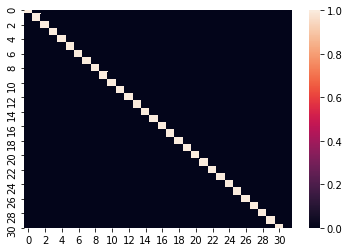

In [332]:
sns.heatmap(X1.corr())

In [333]:
X1['y']=bd1['y']

In [334]:
X1.shape

(10155, 33)

In [335]:
X1

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,y
0,0.854509,-0.040377,-1.178927,-0.940317,-0.398720,-1.850018,2.068344,0.291701,1.765678,-0.049157,...,-0.192194,0.064094,0.781141,0.242197,0.231207,0.225338,-0.103726,-0.223823,0.333952,1
1,-1.927595,1.499851,2.442060,0.818091,-0.084734,1.169857,0.647033,-0.646585,-0.411825,0.461499,...,-0.076035,-0.129594,-1.558830,0.472194,0.577514,-0.072256,0.024117,-0.334828,-0.013284,0
2,2.804527,0.020098,3.021446,2.181713,0.372529,-0.393041,0.662516,-2.379095,-1.880213,2.826781,...,-0.848049,2.084596,-0.279310,-0.842809,-0.213338,-0.125042,0.286558,-0.133084,0.329014,0
3,-1.563696,0.388389,4.126519,1.240956,0.223472,-2.003881,0.930370,1.011580,2.270765,4.213450,...,-0.367949,-0.204716,0.382384,0.351483,-1.618498,0.968339,-0.148264,-0.236847,0.691172,0
4,3.370867,0.684389,-0.960350,1.160467,0.692975,-0.912284,0.255117,0.517311,-0.903971,-0.222209,...,0.768534,-1.886148,1.122793,-0.943412,1.178810,-1.014010,-0.033703,-0.109601,-0.230778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,-1.837327,-0.775596,-1.151287,-1.180562,0.572145,-1.171143,0.855598,0.345305,0.215456,-0.859926,...,-0.670455,-0.243190,-0.264268,0.034595,0.071902,-0.294209,-0.200115,-0.135305,0.086475,0
10151,-0.136066,0.537474,-0.173548,-1.495837,0.848971,-1.480589,1.532675,-0.670710,1.253865,-0.258254,...,0.494556,0.068147,-0.608697,-0.358922,-0.152561,-0.969400,-0.126058,-0.099962,0.008972,0
10152,-0.341972,-1.805467,-0.143685,-0.528037,-3.254999,0.509005,-0.233438,0.158864,-0.019457,-1.208919,...,-0.750925,-0.510735,-1.052051,-0.193082,0.488752,-0.051414,0.858168,0.401011,-0.085023,0
10153,-2.001700,0.024293,-1.285349,-2.181523,0.819580,-1.208299,0.710683,-0.048100,-1.275825,0.233997,...,0.173392,-0.391673,0.480336,-0.156294,-1.216773,0.894074,-0.295665,-0.269675,0.046199,0


In [336]:
bd=X1

In [337]:
bd

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,y
0,0.854509,-0.040377,-1.178927,-0.940317,-0.398720,-1.850018,2.068344,0.291701,1.765678,-0.049157,...,-0.192194,0.064094,0.781141,0.242197,0.231207,0.225338,-0.103726,-0.223823,0.333952,1
1,-1.927595,1.499851,2.442060,0.818091,-0.084734,1.169857,0.647033,-0.646585,-0.411825,0.461499,...,-0.076035,-0.129594,-1.558830,0.472194,0.577514,-0.072256,0.024117,-0.334828,-0.013284,0
2,2.804527,0.020098,3.021446,2.181713,0.372529,-0.393041,0.662516,-2.379095,-1.880213,2.826781,...,-0.848049,2.084596,-0.279310,-0.842809,-0.213338,-0.125042,0.286558,-0.133084,0.329014,0
3,-1.563696,0.388389,4.126519,1.240956,0.223472,-2.003881,0.930370,1.011580,2.270765,4.213450,...,-0.367949,-0.204716,0.382384,0.351483,-1.618498,0.968339,-0.148264,-0.236847,0.691172,0
4,3.370867,0.684389,-0.960350,1.160467,0.692975,-0.912284,0.255117,0.517311,-0.903971,-0.222209,...,0.768534,-1.886148,1.122793,-0.943412,1.178810,-1.014010,-0.033703,-0.109601,-0.230778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,-1.837327,-0.775596,-1.151287,-1.180562,0.572145,-1.171143,0.855598,0.345305,0.215456,-0.859926,...,-0.670455,-0.243190,-0.264268,0.034595,0.071902,-0.294209,-0.200115,-0.135305,0.086475,0
10151,-0.136066,0.537474,-0.173548,-1.495837,0.848971,-1.480589,1.532675,-0.670710,1.253865,-0.258254,...,0.494556,0.068147,-0.608697,-0.358922,-0.152561,-0.969400,-0.126058,-0.099962,0.008972,0
10152,-0.341972,-1.805467,-0.143685,-0.528037,-3.254999,0.509005,-0.233438,0.158864,-0.019457,-1.208919,...,-0.750925,-0.510735,-1.052051,-0.193082,0.488752,-0.051414,0.858168,0.401011,-0.085023,0
10153,-2.001700,0.024293,-1.285349,-2.181523,0.819580,-1.208299,0.710683,-0.048100,-1.275825,0.233997,...,0.173392,-0.391673,0.480336,-0.156294,-1.216773,0.894074,-0.295665,-0.269675,0.046199,0


In [338]:
from sklearn.model_selection import train_test_split
bd.dropna(axis=0,inplace=True)  #we dont have nan in the data so this step is not nessesary
bd_train, bd_test = train_test_split(bd, test_size = 0.2,random_state=2)

In [339]:
x_train=bd_train.drop(["y"],1)
y_train=bd_train["y"]
x_test=bd_test.drop(["y"],1)
y_test=bd_test["y"]

In [340]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
2834,-1.625361,-0.129370,-1.034434,-0.863733,0.087114,1.086905,-0.147865,-0.069775,0.904668,0.937217,...,-0.107675,-0.433925,0.180907,-0.102059,0.153388,0.505155,0.208902,-0.073380,0.024007,0.069166
4036,0.137735,-2.003714,0.102628,-1.449174,0.174147,1.098450,0.591913,0.115463,0.416571,-0.753031,...,-1.808800,-0.188455,-2.685114,-0.113692,0.501237,1.110970,0.004055,-0.269814,0.010232,0.445653
6288,-0.879400,3.201099,-1.492484,0.233186,0.219691,2.340688,-1.068015,-0.239628,0.512054,0.992696,...,0.164033,-0.558146,0.594155,0.372937,-0.143323,0.108772,0.889266,-0.083804,-0.436085,-0.098256
10120,-0.439192,1.204597,4.252381,2.184493,-0.905932,-2.542888,0.802390,0.177205,2.031200,4.446671,...,0.290865,0.067298,0.279763,1.028939,-0.189085,-1.029890,-0.472179,0.165083,-0.014378,-0.436604
3286,-0.834772,-1.451927,-1.679773,-0.905297,-0.242187,-1.144695,-0.230418,-0.487896,-1.275884,0.108906,...,-0.050816,-1.357088,-0.468978,-0.889918,0.740767,0.346896,0.233545,0.772393,0.292433,0.007061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1.763731,-1.714717,-1.412244,2.144746,1.330286,-1.967002,0.810078,1.054172,-0.571872,2.896734,...,1.101844,-0.748758,0.025252,0.843170,0.085100,0.245477,0.274638,0.037186,-0.120755,-0.133426
2514,3.559772,-0.160940,-1.495150,-0.375928,-1.169696,-1.226349,0.415532,-1.540319,0.620128,-1.109384,...,0.963492,-1.629464,0.046883,-0.080638,1.235489,0.560103,1.342148,0.857965,0.201974,-0.065956
6637,0.056168,0.367364,-1.131785,-2.582756,1.800978,-1.396094,-0.164390,-0.619571,-2.996269,2.234920,...,-1.218111,-0.942028,0.525514,1.283250,0.198083,0.334386,1.210736,-0.168066,-0.381644,-0.215163
2575,-0.033179,0.540154,1.285045,-3.388961,1.010054,0.184148,0.496771,0.874069,1.395182,2.998975,...,1.126325,-1.530559,0.082222,0.709096,0.095762,0.090016,0.226199,0.149146,-0.997190,0.450569


In [341]:
#logistic
logr=LogisticRegression(penalty="l1",class_weight="balanced",random_state=2)

In [342]:
logr.fit(x_train,y_train)

C:\Users\MORA.SHIVARAMAKRISHN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [343]:
roc_auc_score(y_test,logr.predict(x_test))

0.8995918649695628

In [344]:
prob_score=pd.Series(list(zip(*logr.predict_proba(x_train)))[1])

In [345]:
prob_score

0       0.039983
1       0.040532
2       0.014829
3       0.289803
4       0.040245
          ...   
8119    0.006701
8120    0.003117
8121    0.139658
8122    0.168575
8123    1.000000
Length: 8124, dtype: float64

In [346]:
cutoffs=np.linspace(0,1,100)

In [347]:
KS_cut=[]
for cutoff in cutoffs:
    predicted=pd.Series([0]*len(y_train))
    predicted[prob_score>cutoff]=1
    df=pd.DataFrame(list(zip(y_train,predicted)),columns=["real","predicted"])
    TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
    FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
    TN=len(df[(df["real"]==0) &(df["predicted"]==0) ])
    FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
    P=TP+FN
    N=TN+FP
    KS=(TP/P)-(FP/N)
    KS_cut.append(KS)

cutoff_data=pd.DataFrame(list(zip(cutoffs,KS_cut)),columns=["cutoff","KS"])

KS_cutoff=cutoff_data[cutoff_data["KS"]==cutoff_data["KS"].max()]["cutoff"]

In [348]:
KS_cutoff

44    0.444444
Name: cutoff, dtype: float64

In [349]:
prob_score_test=pd.Series(list(zip(*logr.predict_proba(x_test)))[1])

predicted_test=pd.Series([0]*len(y_test))
predicted_test[prob_score_test>float(KS_cutoff)]=1

df_test=pd.DataFrame(list(zip(y_test,predicted_test)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print('confusion matrix :\n \n ',k)
TN=k.iloc[0,0]
TP=k.iloc[1,1]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP
print(TP,TN,FP,FN)
print('Accuracy is :',(TP+TN)/(P+N))
Sensitivity=TP/P
print('Sensitivity is :',Sensitivity)
print('Specificity is :',TN/N)
precision=TP/(TP+FP)
print('precision is :',precision)
print('f1 score is :',(2*Sensitivity*precision)/(Sensitivity+precision))

confusion matrix :
 
  predicted     0    1
real                
0          1645  162
1            26  198
198 1645 162 26
Accuracy is : 0.9074347612013787
Sensitivity is : 0.8839285714285714
Specificity is : 0.9103486441615938
precision is : 0.55
f1 score is : 0.678082191780822


In [352]:
#ANN
from sklearn.neural_network import MLPClassifier  #multi layer perceptron(nodes)
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV  #to select the best combination of hyper parammeters

In [353]:
parameters={
'learning_rate': ["invscaling"],
'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(10,10,5),(100,600)],  #5 nodes, 10 nodes and 5 nodes of 3 hidden layers
'alpha': [0.0001, 0.05,0.0002],
'activation': [ "relu",'logistic',"tanh"],#'solver': ['sgd', 'adam'],
'learning_rate_init':[.01,0.02,0.002,0.03]
}

In [354]:
clf=MLPClassifier()

In [355]:
random_search=RandomizedSearchCV(clf,n_iter=30,cv=10,param_distributions=parameters,
                                 scoring='roc_auc',random_state=2,n_jobs=-1,verbose=20)

In [356]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  7.6min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 11.0min
[Paralle

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=200, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           ran...
                   iid='warn', n_iter=30, n_jobs=-1,
                   param_distributions={'activation': ['relu', 'logistic',
                                                    

In [357]:
random_search.best_params_

{'learning_rate_init': 0.01,
 'learning_rate': 'invscaling',
 'hidden_layer_sizes': (100,),
 'alpha': 0.0002,
 'activation': 'relu'}

In [358]:
random_search.best_estimator_

MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='invscaling',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [359]:
mlp=random_search.best_estimator_

In [360]:
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='invscaling',
              learning_rate_init=0.01, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [361]:
predicted=random_search.predict(x_test)

df_test=pd.DataFrame(list(zip(y_test,predicted)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print(k)

predicted     0    1
real                
0          1789   18
1            38  186


In [362]:
TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

print(TP,TN,FP,FN)
print('Accuracy is :',(TP+TN)/(P+N))
Sensitivity=TP/P
print('Sensitivity is :',Sensitivity)
print('Specificity is :',TN/N)
precision=TP/(TP+FP)
print('precision is :',precision)
print('f1 score is :',(2*Sensitivity*precision)/(Sensitivity+precision))

186 1789 18 38
Accuracy is : 0.9724273756770064
Sensitivity is : 0.8303571428571429
Specificity is : 0.9900387382401771
precision is : 0.9117647058823529
f1 score is : 0.8691588785046729
